
Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków:

    wykorzystującą przedział i zmianę znaku,
    wykorzystującą pochodną,
    wykorzystującą przybliżenie pochodnej

1.Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !

2.Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

3.Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

B. Namalowac wstegę Newtona i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny.


Bisection, Newton, Secant

In [2]:
f1(x) = 2*x - exp(-x)
f2(x) = x^3 - 2*x - 5 #wallis function
f3(x) = (x-1)*(x-1)*(x-1)*(x-1)*(x-1)*(x-1)*(x-1)
f4(x) = sin(x) - x/2
f5(x) = cos(x) - x
import Pkg
Pkg.add("SpecialFunctions")
import SpecialFunctions: erf
f6(x) = cos(100*x)-4*erf(30*x-10)

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


f6 (generic function with 1 method)

In [1]:
using Plots
plot(f1)

UndefVarError: UndefVarError: f1 not defined

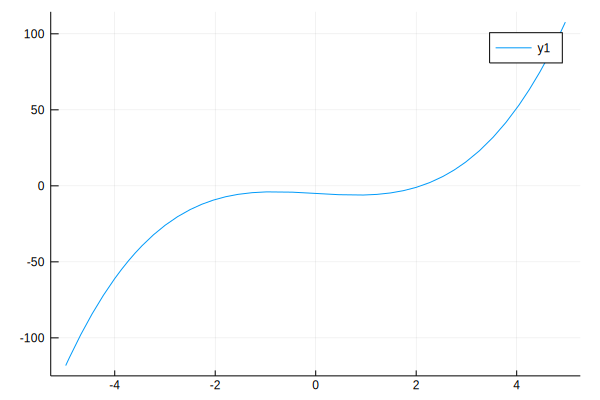

In [4]:
plot(f2)

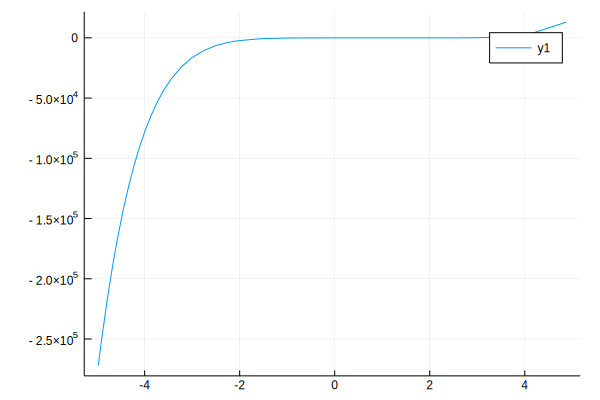

In [5]:
plot(f3)

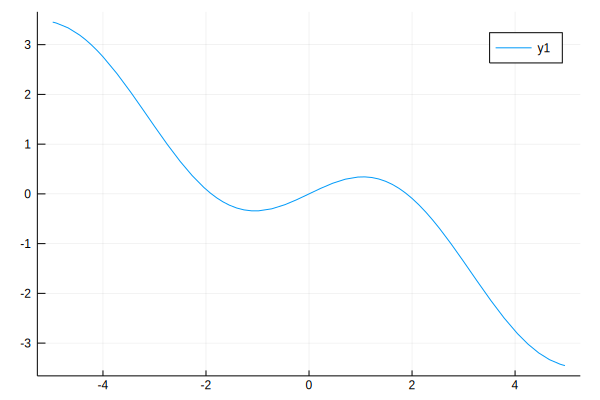

In [6]:
plot(f4)

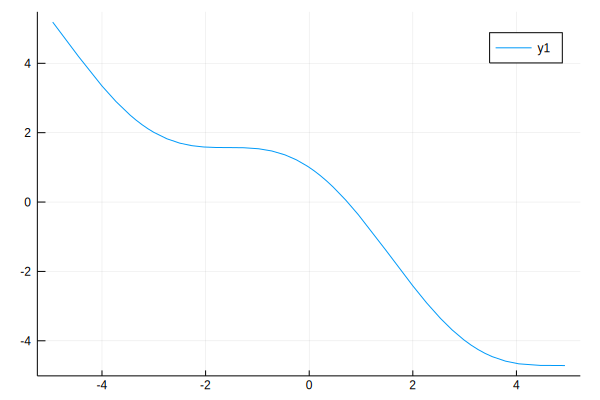

In [7]:
plot(f5)

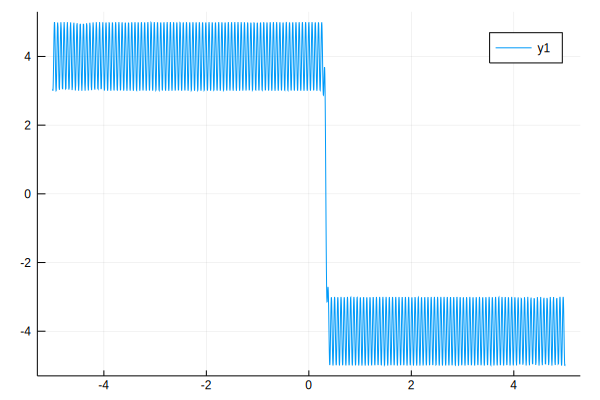

In [7]:
plot(f6)

In [2]:
Pkg.add("Roots")
Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff
using DataFrames

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [11]:
df = DataFrame(Function = String[], Method = String[],Iterations = Int[],Evaluations = Int[] ,Root = Float64[],Value = Float64[], Is_zero = Bool[], Change_sign = Bool[])

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool


In [9]:
x = find_zero(f1, (-10, 10), FalsePosition(), verbose=true)
value = f1(x)
is_zero = iszero(f1(x))
if sign(f1(prevfloat(x))) *sign(f1(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  10.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 5.0000000000000000,  0.2382481241174226)
(a_3, b_3) = ( 0.2382481241174226,  0.3821947783731772)
(a_4, b_4) = ( 0.2382481241174226,  0.3521911602132484)
(a_5, b_5) = ( 0.2382481241174226,  0.3517337532810070)
(a_6, b_6) = ( 0.3517337532810070,  0.3517337112467100)
(a_7, b_7) = ( 0.3517337532810070,  0.3517337112491958)



true

In [13]:
push!(df, ("f1 = 2*x - exp(-x)","FalsePosition",7,9,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true


In [14]:
x = find_zero(f2, (-10, 10), FalsePosition(), verbose=true)
value = f2(x)
is_zero = iszero(f2(x))
if sign(f2(prevfloat(x))) *sign(f2(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 13
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  10.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 5.0000000000000000,  0.0226244343891402)
(a_3, b_3) = ( 5.0000000000000000,  0.2409041423766468)
(a_4, b_4) = ( 5.0000000000000000,  0.6712472869306660)
(a_5, b_5) = ( 5.0000000000000000,  1.4507893059311967)
(a_6, b_6) = ( 1.4507893059311967,  3.1253155954378422)
(a_7, b_7) = ( 3.1253155954378422,  1.7873007151347065)
(a_8, b_8) = ( 3.1253155954378422,  1.9604445073367562)
(a_9, b_9) = ( 1.9604445073367562,  2.1028889314977892)
(a_10, b_10) = ( 2.1028889314977892,  2.0938886841045625)
(a_11, b_11) = ( 2.1028889314977892,  2.0945483801162941)
(a_12, b_12) = ( 2.0945483801162941,  2.0945514815462127)
(a_13, b_13) = ( 2.094551

true

In [15]:
push!(df, ("f2 = x^3 - 2*x - 5","FalsePosition",13,15,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true


In [16]:
x = find_zero(f3, (-10, 10), FalsePosition(), verbose=true)
value = f3(x)
is_zero = iszero(f3(x))
if sign(f3(prevfloat(x))) *sign(f3(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.9830443113097483
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  10.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 5.0000000000000000,  0.0001525832341542)
(a_3, b_3) = ( 5.0000000000000000,  0.0004574053236168)
(a_4, b_4) = ( 5.0000000000000000,  0.1391607403250028)
(a_5, b_5) = ( 5.0000000000000000,  0.2131749608982071)
(a_6, b_6) = ( 5.0000000000000000,  0.2961706828821685)
(a_7, b_7) = ( 5.0000000000000000,  0.3653482115907736)
(a_8, b_8) = ( 5.0000000000000000,  0.4295180145364017)
(a_9, b_9) = ( 5.0000000000000000,  0.4866627152703389)
(a_10, b_10) = ( 5.0000000000000000,  0.5383228781382753)
(a_11, b_11) = ( 5.0000000000000000,  0.5847506231045561)
(a_12, b_12) = ( 5.00000000000000

false

In [17]:
push!(df, ("f3 = (x-1)^7","FalsePosition",41,43,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false


In [18]:
x = find_zero(f4, (-10, 10), FalsePosition(), verbose=true)
value = f4(x)
is_zero = iszero(f4(x))
if sign(f4(prevfloat(x))) *sign(f4(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 10
* function evaluations: 12
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  10.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  2.5000000000000000)
(a_3, b_3) = ( 2.5000000000000000,  1.2500000000000000)
(a_4, b_4) = ( 2.5000000000000000,  1.6651466890159652)
(a_5, b_5) = ( 1.6651466890159652,  1.9446763851217526)
(a_6, b_6) = ( 1.9446763851217526,  1.8880306380481127)
(a_7, b_7) = ( 1.9446763851217526,  1.8952878661159387)
(a_8, b_8) = ( 1.8952878661159387,  1.8954942966408586)
(a_9, b_9) = ( 1.8954942966408586,  1.8954942670304449)
(a_10, b_10) = ( 1.8954942966408586,  1.8954942670339809)



true

In [19]:
push!(df, ("f4(x) = sin(x) - x/2","FalsePosition",10,12,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true


In [20]:
x = find_zero(f5, (-10, 10), FalsePosition(), verbose=true)
value = f5(x)
is_zero = iszero(f5(x))
if sign(f5(prevfloat(x))) *sign(f5(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  10.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 5.0000000000000000,  0.4792634390037112)
(a_3, b_3) = ( 0.4792634390037112,  0.8392626315659703)
(a_4, b_4) = ( 0.8392626315659703,  0.7328448542700907)
(a_5, b_5) = ( 0.8392626315659703,  0.7389537847646608)
(a_6, b_6) = ( 0.7389537847646608,  0.7390851425612163)
(a_7, b_7) = ( 0.7390851425612163,  0.7390851332148896)
(a_8, b_8) = ( 0.7390851425612163,  0.7390851332151607)



true

In [21]:
push!(df, ("f5(x) = cos(x) - x","FalsePosition",8,10,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true


In [22]:
x = find_zero(f6, (-10, 10), FalsePosition(), verbose=true)
value = f6(x)
is_zero = iszero(f6(x))
if sign(f6(prevfloat(x))) *sign(f6(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.3318660335745625
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 15
* function evaluations: 17
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: x_n ≈ x_{n-1}. Change of sign at xn identified. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  10.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  0.4643517812315325)
(a_3, b_3) = ( 0.4643517812315325,  0.0011109324436309)
(a_4, b_4) = ( 0.4643517812315325,  0.2379911377445042)
(a_5, b_5) = ( 0.2379911377445042,  0.4312481632182621)
(a_6, b_6) = ( 0.2379911377445042,  0.3459548402949304)
(a_7, b_7) = ( 0.3459548402949304,  0.2656463184286902)
(a_8, b_8) = ( 0.3459548402949304,  0.3146739706152683)
(a_9, b_9) = ( 0.3146739706152683,  0.3415768575667255)
(a_10, b_10) = ( 0.3415768575667255,  0.3313475575516753)
(a_11, b_

true

In [23]:
push!(df, ("f6(x) = cos(100*x)-4*erf(30*x-10)","FalsePosition",15,17,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true


In [24]:
D(f1) = x->ForwardDiff.derivative(f1, float(x))
x = find_zero((f1, D(f1)),0, Roots.Newton(),verbose=true)
value = f1(x)
is_zero = iszero(f1(x))
if sign(f1(prevfloat(x))) *sign(f1(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.3333333333333333,	 fx_1 = -0.0498646439071226
x_2 =  0.3516893315554154,	 fx_2 = -0.0001199797491258
x_3 =  0.3517337109929426,	 fx_3 = -0.0000000006927722
x_4 =  0.3517337112491958,	 fx_4 =  0.0000000000000000



true

In [25]:
push!(df, ("f1(x) = 2*x - exp(-x)","Newton",4,9,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true


In [26]:
D(f2) = x->ForwardDiff.derivative(f2, float(x))
x = find_zero((f2, D(f2)),0, Roots.Newton(),verbose=true)
value = f2(x)
is_zero = iszero(f2(x))
if sign(f2(prevfloat(x))) *sign(f2(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 19
* function evaluations: 39
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -5.0000000000000000
x_1 = -2.5000000000000000,	 fx_1 = -15.6250000000000000
x_2 = -1.5671641791044775,	 fx_2 = -5.7146324514651070
x_3 = -0.5025924450866797,	 fx_3 = -4.1217695422221725
x_4 = -3.8207064676993294,	 fx_4 = -53.1324879623681738
x_5 = -2.5493933913606064,	 fx_5 = -16.4707576140240164
x_6 = -1.6081114997282251,	 fx_6 = -5.9423896750176617
x_7 = -0.5761004336602393,	 fx_7 = -4.0390020905449111
x_8 = -4.5977095833821693,	 fx_8 = -92.9952575692345391
x_9 = -3.0835431467266550,	 fx_9 = -28.1519768702820130
x_10 = -2.0221942554643366,	 fx_10 = -9.2249089970538503
x_11 = -1.1237641075795191,	 fx_11 = -4.1716125339957122
x_12 =  1.2086516123957836,	 fx_12 = -5.6516581502357903
x_13 =  3.5807900448965704,	 fx_13 =  33.75151520853

true

In [27]:
push!(df, ("f2(x) = x^3 - 2x - 5","Newton",19,39,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true


In [28]:
D(f3) = x->ForwardDiff.derivative(f3, float(x))
x = find_zero((f3, D(f3)),0, Roots.Newton(),verbose=true)
value = f3(x)
is_zero = iszero(f3(x))
if sign(f3(prevfloat(x))) *sign(f3(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.9938233080518548
* Algorithm: Roots.Newton()
* iterations: 33
* function evaluations: 67
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.1428571428571428,	 fx_1 = -0.3399166770891140
x_2 =  0.2653061224489796,	 fx_2 = -0.1155433473633047
x_3 =  0.3702623906705539,	 fx_3 = -0.0392751106954878
x_4 =  0.4602249062890462,	 fx_4 = -0.0133502651199173
x_5 =  0.5373356339620396,	 fx_5 = -0.0045379777578210
x_6 =  0.6034305433960340,	 fx_6 = -0.0015425343201428
x_7 =  0.6600833229108862,	 fx_7 = -0.0005243331403989
x_8 =  0.7086428482093311,	 fx_8 = -0.0001782295787721
x_9 =  0.7502652984651409,	 fx_9 = -0.0000605832061752
x_10 =  0.7859416843986922,	 fx_10 = -0.0000205932421305
x_11 =  0.8165214437703076,	 fx_11 = -0.0000069999864355
x_12 =  0.8427326660888350,	 fx_12 = -0.0000023794121288
x_13 =  0.8651994280761443,	 fx_13 = -0.0000008088018643


false

In [29]:
push!(df, ("f3(x) = (x-1)^7","Newton",33,67,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [30]:
D(f4) = x->ForwardDiff.derivative(f4, float(x))
x = find_zero((f4, D(f4)),0, Roots.Newton(),verbose=true)
value = f4(x)
is_zero = iszero(f4(x))
if sign(f4(prevfloat(x))) *sign(f4(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [31]:
push!(df, ("f4(x) = sin(x) - x/2","Newton",0,1,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [33]:
D(f5) = x->ForwardDiff.derivative(f5, float(x))
x = find_zero((f5, D(f5)),0, Roots.Newton(),verbose=true)
value = f5(x)
is_zero = iszero(f5(x))
if sign(f5(prevfloat(x))) *sign(f5(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



true

In [34]:
push!(df, ("f5(x) = cos(x) - x","Newton",5,11,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [35]:
D(f6) = x->ForwardDiff.derivative(f6, float(x))
x = find_zero((f6, D(f6)),0, Roots.Newton(),verbose=true)
value = f6(x)
is_zero = iszero(f6(x))
if sign(f6(prevfloat(x))) *sign(f6(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 9.926174124369038e41
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations: 3
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  5.0000000000000000
x_1 =  992617412436903833480015075729737592602624.0000000000000000,	 fx_1 = -3.3152873109355183



false

In [36]:
push!(df, ("f6(x) = cos(100*x)-4*erf(30*x-10)","Newton",1,3,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [37]:
x = find_zero(f1, 0, verbose=true)
value = f1(x)
is_zero = iszero(f1(x))
if sign(f1(prevfloat(x))) *sign(f1(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 6
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.0006055454452393,	 fx_1 = -0.9981835469699233
x_2 =  0.0611600899691728,	 fx_2 = -0.8183524555296526
x_3 =  0.3367240083536633,	 fx_3 = -0.0406578832636679
x_4 =  0.3511304939135544,	 fx_4 = -0.0016309064270826
x_5 =  0.3517325295257331,	 fx_5 = -0.0000031947513749
x_6 =  0.3517337111564411,	 fx_6 = -0.0000000002507594



true

In [38]:
push!(df, ("f1(x) = 2*x - exp(-x)","Secant",6,9,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [39]:
x = find_zero(f2, 0, verbose=true)
value = f2(x)
is_zero = iszero(f2(x))
if sign(f2(prevfloat(x))) *sign(f2(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Secant()

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -5.0000000000000000
x_1 = -0.0006055454452393,	 fx_1 = -4.9987889093315658
x_2 = -0.0611600899691728,	 fx_2 = -4.8779085928401535
x_3 = -0.4197831196420934,	 fx_3 = -4.2344070468869406
x_4 = -0.5156341885182639,	 fx_4 = -4.1058277275592028
x_5 = -0.6163689737546524,	 fx_5 = -4.0014272280457996
x_6 = -0.6583829435986865,	 fx_6 = -3.9686221167143780
x_7 = -0.7010168678911720,	 fx_7 = -3.9424632325117877



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = -4.96440929713972")

In [40]:
push!(df, ("f2(x) = x^3 - 2*x - 5","Secant",-1,-1,-1,-1,false,false))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [41]:
x = find_zero(f3, 0, verbose=true)
value = f3(x)
is_zero = iszero(f3(x))
if sign(f3(prevfloat(x))) *sign(f3(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.9856469261028176
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.0006055454452393,	 fx_1 = -0.9957688745074786
x_2 =  0.0611600899691728,	 fx_2 = -0.6428961160740295
x_3 =  0.1714839405772408,	 fx_3 = -0.2679825506802784
x_4 =  0.2503417617280164,	 fx_4 = -0.1330586846278539
x_5 =  0.3281094559242665,	 fx_5 = -0.0618144064284469
x_6 =  0.3955838409211263,	 fx_6 = -0.0294681225201645
x_7 =  0.4570543779911074,	 fx_7 = -0.0139089501016431
x_8 =  0.5120052847507631,	 fx_8 = -0.0065903098183608
x_9 =  0.5614876320623549,	 fx_9 = -0.0031179771485537
x_10 =  0.6059202492236920,	 fx_10 = -0.0014760084332975
x_11 =  0.6458618857690509,	 fx_11 = -0.0006985680079171
x_12 =  0

false

In [42]:
push!(df, ("f3(x) = (x-1)^7","Secant",41,43,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [43]:
x = find_zero(f4, 0, verbose=true)
value = f4(x)
is_zero = iszero(f4(x))
if sign(f4(prevfloat(x))) *sign(f4(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [44]:
push!(df, ("f4(x) = sin(x) - x/2","Secant",0,2,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [45]:
x = find_zero(f5, 0, verbose=true)
value = f5(x)
is_zero = iszero(f5(x))
if sign(f5(prevfloat(x))) *sign(f5(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 11
* Note: Exact zero found. Bracketing used over (0.0, 0.9999969722835395), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000



true

In [46]:
push!(df, ("f5(x) = cos(x) - x","Secant",2,11,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [47]:
x = find_zero(f6, 0, verbose=true)
value = f6(x)
is_zero = iszero(f6(x))
if sign(f6(prevfloat(x))) *sign(f6(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 0.3318660335745625
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 8
* function evaluations: 33
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. Bracketing used over (0.0, 165.1403773036419), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  5.0000000000000000



true

In [48]:
push!(df, ("f6(x) = cos(100*x)-4*erf(30*x-10)","Secant",8,33,x,value,is_zero,change))

,Function,Method,Iterations,Evaluations,Root,Value,Is_zero,Change_sign
,String,String,Int64,Int64,Float64,Float64,Bool,Bool
1,f1 = 2*x - exp(-x),FalsePosition,7,9,0.351734,0.0,true,true
2,f2 = x^3 - 2*x - 5,FalsePosition,13,15,2.09455,-8.88178e-16,false,true
3,f3 = (x-1)^7,FalsePosition,41,43,0.983044,-4.0291e-13,false,false
4,f4(x) = sin(x) - x/2,FalsePosition,10,12,1.89549,0.0,true,true
5,f5(x) = cos(x) - x,FalsePosition,8,10,0.739085,0.0,true,true
6,f6(x) = cos(100*x)-4*erf(30*x-10),FalsePosition,15,17,0.331866,7.07767e-15,false,true
7,f1(x) = 2*x - exp(-x),Newton,4,9,0.351734,0.0,true,true
8,f2(x) = x^3 - 2x - 5,Newton,19,39,2.09455,-8.88178e-16,false,true
9,f3(x) = (x-1)^7,Newton,33,67,0.993823,-3.42998e-16,false,false


In [49]:
g(x) = 2*x^3-4*x^2+3*x

g (generic function with 1 method)

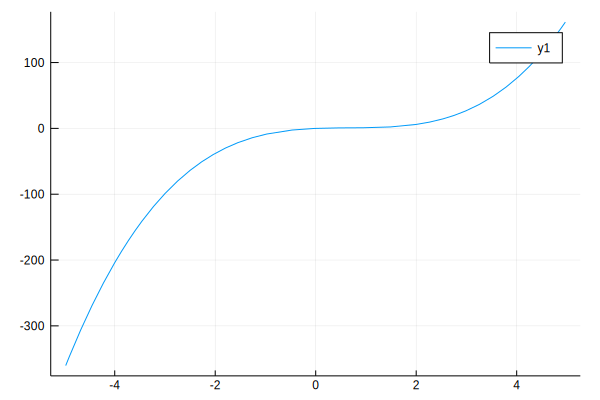

In [54]:
plot(g)

In [50]:
x = find_zero(g, (-1, 1), FalsePosition(), verbose=true)
value = g(x)
is_zero = iszero(g(x))
if sign(g(prevfloat(x))) *sign(g(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Converged to: 4.547473508864641e-13
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  0.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  0.2500000000000000)
(a_3, b_3) = ( 0.0000000000000000,  0.1250000000000000)
(a_4, b_4) = ( 0.0000000000000000,  0.0625000000000000)
(a_5, b_5) = ( 0.0000000000000000,  0.0312500000000000)
(a_6, b_6) = ( 0.0000000000000000,  0.0156250000000000)
(a_7, b_7) = ( 0.0000000000000000,  0.0078125000000000)
(a_8, b_8) = ( 0.0000000000000000,  0.0039062500000000)
(a_9, b_9) = ( 0.0000000000000000,  0.0019531250000000)
(a_10, b_10) = ( 0.0000000000000000,  0.0009765625000000)
(a_11, b_11) = ( 0.0000000000000000,  0.0004882812500000)
(a_12, b_12) = ( 0.000000000000

false

In [65]:
h(x) = (x-2)^2-1

h (generic function with 1 method)

In [67]:
D(h) = x->ForwardDiff.derivative(h, float(x))
x = find_zero((h, D(h)),2, Roots.Newton(),verbose=true)
value = h(x)
is_zero = iszero(h(x))
if sign(h(prevfloat(x))) *sign(h(nextfloat(x))) < 0
    change = true
else
    change = false
end

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x_0 =  2.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  2.0000000000000000,	 fx_1 = -1.0000000000000000



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 2.0")

In [3]:
p(x) = 1/((x+1)^2-2)

p (generic function with 1 method)

In [9]:
x = Roots.secant_method(p, (0,4))

95887.50793455799

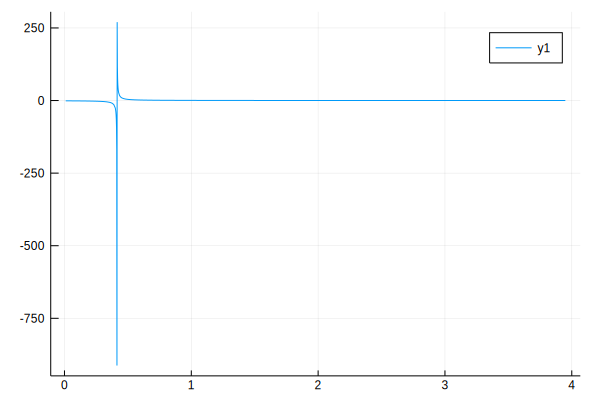

In [8]:
plot(p, 0, 4)

In [10]:
p(x)

1.087594188624951e-10

In [11]:
iszero(p(x))

false

In [12]:
sign(p(prevfloat(x))) *sign(p(nextfloat(x)))

1.0